# 新一轮空值填充和模型训练
## 1 数据填充

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("./data/data.csv")

In [3]:
train.shape

(1460, 81)

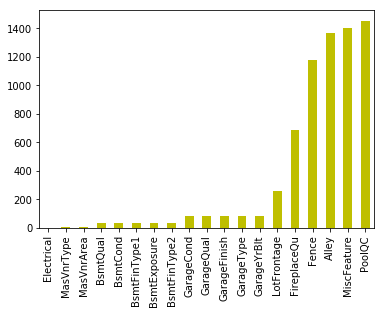

In [4]:
# 统计缺失值
x = train.isnull().sum()
x[x>0].sort_values().plot.bar(color='y')

- 柱状图越高，代表对应特征缺失值得数目越多

In [5]:
x[x>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### 1.1 LotFrontage的填充
- LotFrontage：临街面; 临海或临路部分的土地; 临街地界; 正面宽度; 屋向; 前方; 正面; 临街地。
- 填充的思路
    - （1）思路一：填不同的Neighborhood的均值和中位数
    - （2）思路二：通过LotArea进行填充，分析Lotfrontage 与 LotArea相关性

In [7]:
train['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

#### 1.1.1 填不同的Neighborhood的均值和中位数
- 这里只分析，并不真正填充。

In [26]:
import seaborn as sns

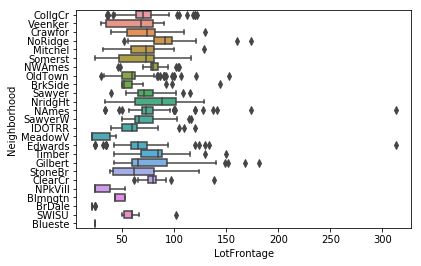

In [27]:
# 用箱线图看'LotFrontage'与'Neighborhood'的关系
sns.boxplot('LotFrontage', 'Neighborhood', data=train)

In [16]:
# 按Neighborhood的种类分组，各组的中位数和均值如下：
neighborhood_group=train.groupby("Neighborhood")
lot_medians=neighborhood_group["LotFrontage"].median()
lot_mean=neighborhood_group["LotFrontage"].mean()

In [17]:
lot_medians

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [19]:
lot_mean

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [20]:
# 查看LotFrontage是空值的行的Neighborhood的值
train[train["LotFrontage"].isnull()]["Neighborhood"]

7        NWAmes
12       Sawyer
14        NAmes
16        NAmes
24       Sawyer
31       Sawyer
42      SawyerW
43      CollgCr
50      Gilbert
64      CollgCr
66        NAmes
76        NAmes
84      Gilbert
95      Gilbert
100      NWAmes
104      IDOTRR
111     Gilbert
113     Crawfor
116      Sawyer
120     ClearCr
126     NPkVill
131     Gilbert
133      Timber
136       NAmes
147     Gilbert
149     BrkSide
152      NWAmes
153     ClearCr
160     Veenker
166     ClearCr
         ...   
1300    Gilbert
1301    Crawfor
1309    SawyerW
1312    NoRidge
1318    CollgCr
1321    BrkSide
1342    CollgCr
1346     NWAmes
1348    SawyerW
1354    CollgCr
1356      NAmes
1357      NAmes
1358    Somerst
1362      NAmes
1365    Somerst
1368    CollgCr
1373    NoRidge
1381      NAmes
1383     Sawyer
1396     Timber
1407    Mitchel
1417    NoRidge
1419    Crawfor
1423    Edwards
1424      NAmes
1429     NWAmes
1431    NPkVill
1441    CollgCr
1443    BrkSide
1446    Mitchel
Name: Neighborhood, Leng

- 就此打住，不做填充了。

#### 1.1.2 通过LotArea进行填充

In [21]:
# 分析LotFrontage与LotArea相关性
train['LotFrontage'].corr(train["LotArea"])

0.42609501877180816

In [22]:
# 可见相关性不高，这是他们的度量衡不一样 area是平方后的数据
train['LotFrontage'].corr(np.sqrt(train["LotArea"]))

0.6020022167939364

In [23]:
# 相关性比较大，可添加一列SqrtLotArea
train['SqrtLotArea']=np.sqrt(train["LotArea"])

In [24]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242


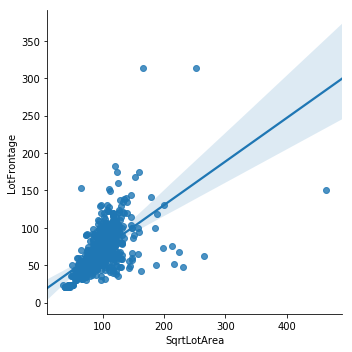

In [34]:
# 画出带回归的散点图，阴影置信区间
sns.lmplot('SqrtLotArea', 'LotFrontage', data=train)

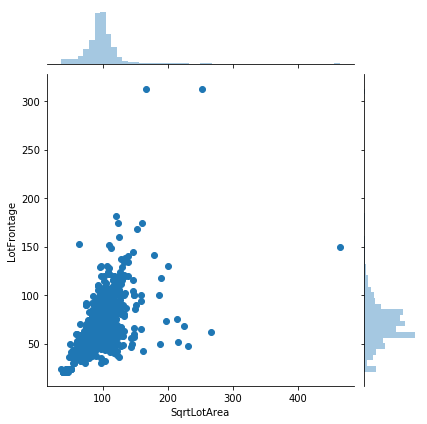

In [35]:
# 看一下两个的分布是否相近
sns.jointplot('SqrtLotArea', 'LotFrontage', data=train)

In [37]:
filter_LotFrontage = train['LotFrontage'].isnull()

In [39]:
train.LotFrontage[filter_LotFrontage] = 0.6*train.SqrtLotArea[filter_LotFrontage]

/Users/lyy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
# 之前索引为7的LotFrontage是空值，现在看一下填充后的
train['LotFrontage'][7]

61.13525987513261

In [42]:
# 填充后的不是空置了
filter_LotFrontage.sum()

259

In [45]:
# 统计填充后的LotFrontage空值数量，可见没有空值了
train['LotFrontage'].isnull().sum()

0

### 1.2 MasVnrtype与MasVnrArea的填充
- MasVnrtype：Masonry veneer type，砖石镶板种类
       BrkCmn：Brick Common
       BrkFace：Brick Face
       CBlock：Cinder Block
       None：None
       Stone：Stone
- MasVnrArea：Masonry veneer area in square feet，砖石镶板面积

In [46]:
x = train.isnull().sum()
x[x>0]

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

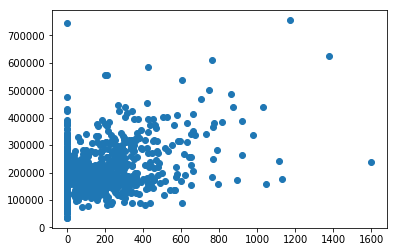

In [47]:
# 画MasVnrArea与SalePrice的散点图，看两者的相关性
plt.scatter(train["MasVnrArea"], train["SalePrice"])

In [48]:
train['MasVnrArea'].corr(train["SalePrice"])

0.47749304709571594

/Users/lyy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


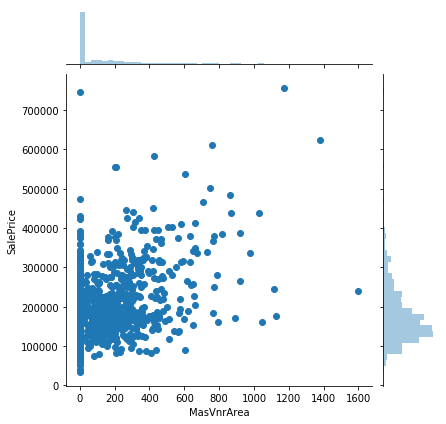

In [49]:
# 查看下分布情况
sns.jointplot(train["MasVnrArea"], train["SalePrice"])

- 看不出有啥相关性

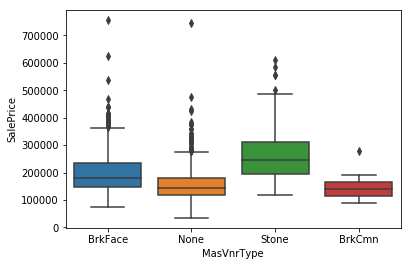

In [50]:
sns.boxplot("MasVnrType", "SalePrice", data=train)

In [52]:
# 统计MasVnrType各种类型的数量
train.groupby(["MasVnrType"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,15,15,15,0,15,15,15,...,0,7,2,15,15,15,15,15,15,15
BrkFace,445,445,445,445,445,445,10,445,445,445,...,2,80,11,445,445,445,445,445,445,445
None,864,864,864,864,864,864,77,864,864,864,...,4,188,40,864,864,864,864,864,864,864
Stone,128,128,128,128,128,128,3,128,128,128,...,1,6,1,128,128,128,128,128,128,128
